In [4]:
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfA

c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       941
           1       0.90      0.71      0.80       185

    accuracy                           0.94      1126
   macro avg       0.92      0.85      0.88      1126
weighted avg       0.94      0.94      0.94      1126

ROC-AUC Score: 0.9591061837608066
Accuracy Score: 0.9396092362344582


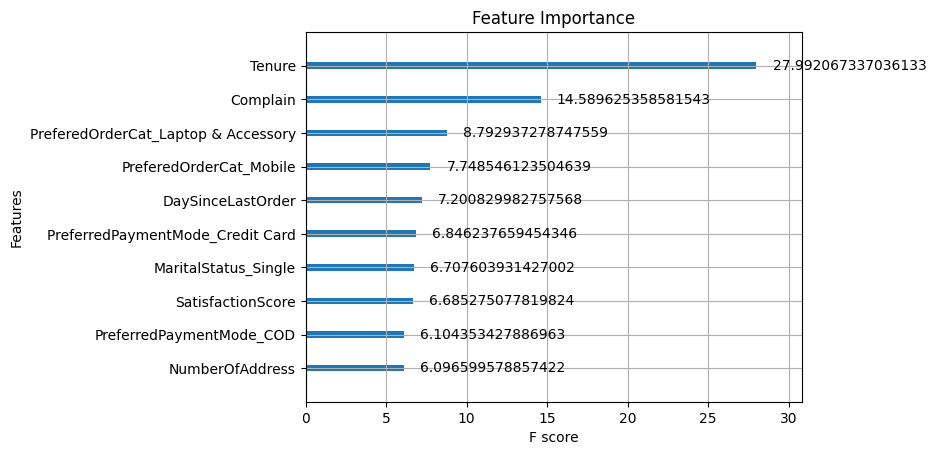

In [5]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import xgboost as xgb

# 데이터 로드
# data = pd.read_csv("your_data.csv")  # 데이터 파일 경로로 교체
# 이미 데이터프레임이 있다고 가정 (data)

# 1. 데이터 전처리
# 결측치 처리 (범주형 변수는 'Unknown'으로, 수치형 변수는 평균으로 대체)
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 범주형 변수 결측치 처리
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# 수치형 변수 결측치 처리
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# 범주형 변수 인코딩 (One-Hot Encoding)
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 타겟 변수와 독립 변수 설정
X = data.drop('Churn', axis=1)  # 타겟 변수 'Churn'을 제외한 나머지
y = data['Churn']  # 타겟 변수 (이탈 여부)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient Boosting 모델 학습 (XGBoost)
# 모델 초기화 및 학습
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

# 3. 모델 평가
# 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 성능 지표 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 4. 변수 중요도 시각화
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10, importance_type="gain")
plt.title("Feature Importance")
plt.show()


결과 해석
1. Classification Report
정확도(Accuracy): 94%
전체 데이터 중에서 94%의 샘플이 정확히 예측됨.
이는 모델이 전체적으로 좋은 성능을 보여주고 있음을 의미합니다.
Precision (정밀도):
0 클래스 (이탈하지 않은 고객): 95%
이탈하지 않은 고객으로 예측된 값 중 95%가 실제로 이탈하지 않은 고객.
1 클래스 (이탈한 고객): 90%
이탈 고객으로 예측된 값 중 90%가 실제 이탈 고객.
Recall (재현율):
0 클래스: 98%
실제로 이탈하지 않은 고객 중 98%를 정확히 예측.
1 클래스: 71%
실제 이탈한 고객 중 71%만을 정확히 예측.
재현율이 이탈 고객(1 클래스)에서 상대적으로 낮음 → 이탈 고객을 더 잘 포착하기 위해 Recall 개선 필요.
F1-Score:
0 클래스: 96% (균형 잡힌 성능)
1 클래스: 80% (Recall의 낮은 성능이 반영됨)
클래스 간 불균형을 고려한 모델 개선이 필요할 수도 있음.
2. ROC-AUC Score
ROC-AUC Score: 0.95
모델이 이진 분류에서 클래스 분리를 얼마나 잘 수행하는지 나타내는 지표.
AUC 값이 1에 가까울수록 완벽한 분류, 0.5는 무작위 분류를 의미.
0.95는 매우 높은 분류 성능을 의미합니다.
3. Feature Importance
XGBoost 모델이 예측에 있어 가장 중요한 변수들을 보여줍니다. 그래프는 변수 중요도를 F-score로 나타냅니다.

주요 변수
Tenure (고객 유지 기간): 가장 중요한 변수로 F-score가 27.99로 가장 높음.

고객이 서비스를 얼마나 오래 유지했는지가 이탈 여부를 결정하는 데 가장 중요한 역할을 함.
일반적으로 유지 기간이 짧을수록 이탈 가능성이 높아지는 경향.
Complain (불만 여부): 두 번째로 중요한 변수.

고객이 불만을 제기한 여부가 이탈에 큰 영향을 미침.
불만 고객에 대한 관리가 이탈률 감소에 중요하다는 점을 시사.
PreferredOrderCat_Laptop & Accessory (노트북 및 액세서리 주문 선호도): 세 번째로 중요한 변수.

특정 제품군에 대한 선호가 이탈 여부에 영향을 미침.
특정 제품군 고객의 행동이 이탈률과 어떻게 관련되는지 추가 분석 필요.
PreferredOrderCat_Mobile (모바일 주문 선호도): 네 번째로 중요한 변수.

모바일 제품군을 선호하는 고객의 이탈 패턴 분석이 중요.
DaySinceLastOrder (마지막 주문 이후 경과일): 이탈률에 큰 영향을 미침.

마지막 주문 이후 시간이 길어질수록 이탈 가능성이 증가할 수 있음.
기타 중요한 변수
PreferredPaymentMode_Credit Card: 신용카드 결제 선호 여부.
SatisfactionScore: 고객 만족도 점수.
NumberOfAddress: 고객이 등록한 주소 수.
제안된 액션 플랜
고객 유지 기간 (Tenure):

신규 고객의 이탈률을 줄이기 위한 초기 관리 및 혜택 제공.
고객이 3개월 이상 유지되도록 집중적인 리텐션 전략 필요.
불만 관리 (Complain):

불만 제기 고객을 대상으로 신속한 문제 해결과 맞춤형 서비스 제공.
불만 고객 대상 만족도 조사 및 추가 혜택 제공.
마지막 주문 이후 경과일 (DaySinceLastOrder):

장기 미사용 고객에게 리마인더 또는 특별 프로모션 제공.
예를 들어, 30일 이상 주문하지 않은 고객에게 쿠폰 제공.
주문 선호도 (PreferredOrderCat):

특정 제품군(예: 노트북, 모바일) 고객에 대해 세분화된 분석 수행.
제품군별로 맞춤화된 마케팅 전략 도입.
고객 만족도 (SatisfactionScore):

만족도 점수가 낮은 고객에 대한 추가 관리 필요.
불만족 원인을 파악하고, 만족도를 높이기 위한 조치(서비스 개선, 가격 할인 등) 수행.
다음 단계
모델 개선:

이탈 고객(1 클래스)에 대한 Recall 개선을 위해 하이퍼파라미터 튜닝 수행.
Oversampling(SMOTE) 또는 클래스 가중치 조정을 통한 클래스 불균형 처리.
세분화된 고객 관리:

Feature Importance 상위 변수(Tenure, Complain 등)를 중심으로 세분화된 고객 관리 전략 수립.
군집화(K-Means)와 결합하여 고객군별 맞춤 전략 도출 가능.
시간 기반 분석:

DaySinceLastOrder를 기준으로 코호트 분석을 진행하여 시간이 지남에 따른 이탈 패턴 파악.
필요하다면, 추가 구현이나 모델 개선 방법을 안내드리겠습니다!

In [12]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 하이퍼파라미터 설정
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

# Cross-validation 수행
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics="auc",
    early_stopping_rounds=10,
    seed=42
)

print(cv_results)

# 최적 모델 학습
best_n_estimators = cv_results['test-auc-mean'].idxmax()
params['n_estimators'] = best_n_estimators

model = xgb.train(params, dtrain)


c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.877415       0.006708       0.850243      0.009438
1          0.894806       0.002906       0.864767      0.008850
2          0.904901       0.001880       0.874096      0.010354
3          0.912353       0.004615       0.877225      0.011044
4          0.915537       0.004468       0.883034      0.007329
..              ...            ...            ...           ...
167        0.999787       0.000077       0.958245      0.005154
168        0.999795       0.000074       0.958202      0.005212
169        0.999808       0.000068       0.958123      0.005299
170        0.999821       0.000064       0.958069      0.005283
171        0.999835       0.000060       0.958263      0.005510

[172 rows x 4 columns]


c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Optuna: 하이퍼파라미터 튜닝을 효율적으로 수행하는 라이브러리.

In [15]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best trial:", study.best_trial.params)


c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-07 16:52:49,871] A new study created in memory with name: no-name-e8646f87-3333-40c5-98da-42af6cedc9a2
c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:52:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-07 16:52:50,021] Trial 0 finished with value: 0.9668725048108683 and parameters: {'learning_rate': 0.058332209201261205, 'max_depth': 6, 'subsample': 0.796309326388761, 'colsample_bytree': 0.8010524335956268, 'n_estimators': 117}. Best is trial 0 with value: 0.9668725048108683.
c

Best trial: {'learning_rate': 0.08324095850226167, 'max_depth': 7, 'subsample': 0.7814676071826653, 'colsample_bytree': 0.8791847606602246, 'n_estimators': 200}


c:\Users\Admin\miniconda3\envs\project\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Model Performance ===
Confusion Matrix:
 [[935   6]
 [ 36 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       941
           1       0.96      0.81      0.88       185

    accuracy                           0.96      1126
   macro avg       0.96      0.90      0.93      1126
weighted avg       0.96      0.96      0.96      1126


ROC-AUC Score: 0.983651664416808


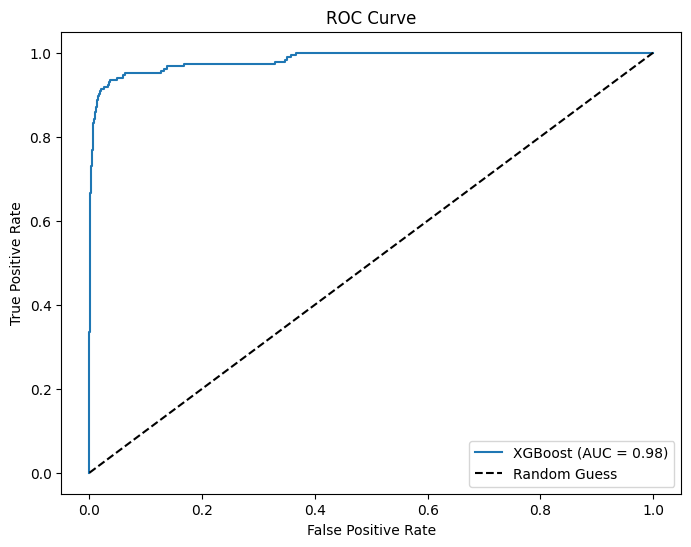

In [16]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# 최적의 하이퍼파라미터 적용
best_params = {
    'learning_rate': 0.08324095850226167,
    'max_depth': 7,
    'subsample': 0.7814676071826653,
    'colsample_bytree': 0.8791847606602246,
    'n_estimators': 200,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(**best_params)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 성능 평가
print("\n=== Model Performance ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Optimal Threshold: 0.27221805


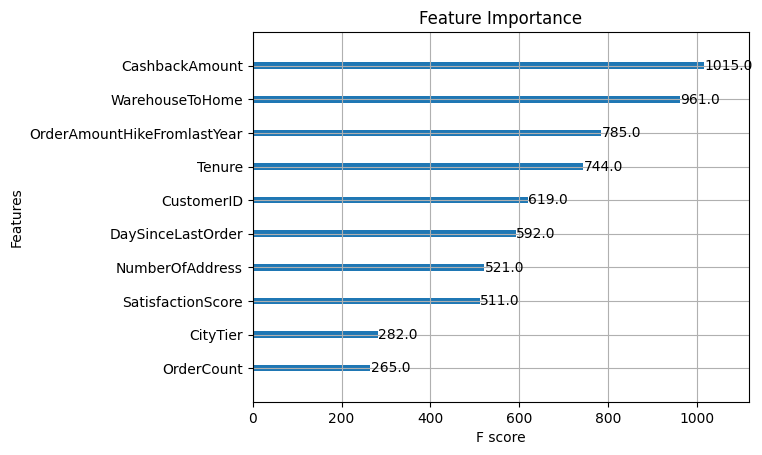

: 

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))  # F1 최적화
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


xgb.plot_importance(model, max_num_features=10)
plt.title("Feature Importance")
plt.show()
